In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

# Aggression dataset - linear - word - oh label

In [2]:
aggression_rs = pd.read_csv("linear_word_oh_aggression_prediction_results.csv")

In [3]:
aggression_data = pd.read_csv("../aggression_parsed_dataset.csv")

In [4]:
aggression_data = aggression_data.dropna()
print(len(aggression_data))
len(aggression_data[aggression_data["oh_label"] == 1])/len(aggression_data)

115864


0.1275806117517089

In [5]:
len(aggression_data[aggression_data["oh_label"] == 1])

14782

In [6]:
len(aggression_data[aggression_data["oh_label"] == 0])

101082

In [6]:
aggression_rs.columns

Index(['Unnamed: 0', 'y_true_bool', 'y_predict_prob_0', 'y_predict_prob_1',
       'y_true_binary', 'y_prediction'],
      dtype='object')

(0, 25000)

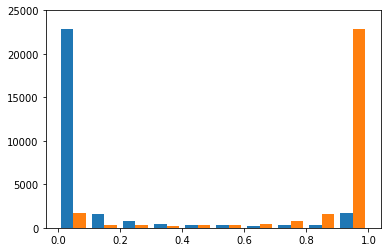

In [108]:
# 1 prediction distribution of aggression
# 0 negative prediction distribution of aggression
plt.hist([aggression_rs["y_predict_prob_1"],aggression_rs["y_predict_prob_0"]])
plt.ylim(0, 25000)

In [23]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [34]:
#avergae number of words per post
aggression_data["No words"] = aggression_data["Text"].apply(lambda x : return_no_words(x))

In [36]:
np.mean(aggression_data["No words"])

83.81127010978389

In [125]:
np.std(aggression_data["No words"])

160.59556305295038

(0, 3000)

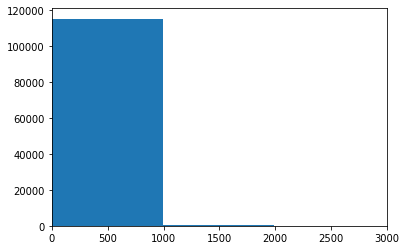

In [69]:
plt.hist(aggression_data["No words"])
plt.xlim(0,3000)

In [70]:
len(aggression_data[aggression_data["No words"] == 0])

5

In [71]:
aggression_data[aggression_data["No words"] == 0]

index     Text  ed_label_0  ed_label_1  oh_label  No words
948      948                  1.0         0.0         0         0
1832    1832                  1.0         0.0         0         0
1859    1859                  1.0         0.0         0         0
73273  73273                  1.0         0.0         0         0
82642  82642                  1.0         0.0         0         0

In [72]:
len(aggression_data[aggression_data["No words"] > 1000])

545

(0, 90)

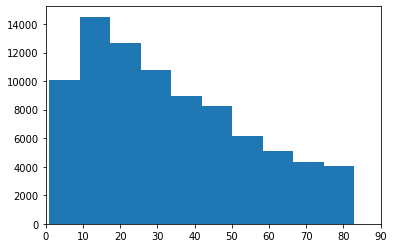

In [99]:
plt.hist(aggression_data[(aggression_data["No words"] > 0) & (aggression_data["No words"] <= 83)]["No words"])
plt.xlim(0,90)

In [92]:
len(aggression_data[aggression_data["No words"] == 5])

1190

(0, 50)

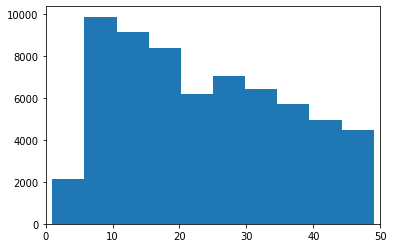

In [90]:
plt.hist(aggression_data[(aggression_data["No words"] > 0) & (aggression_data["No words"] < 50)]["No words"])
plt.xlim(0,50)

In [45]:
# predict.prob scores
fpr, tpr, thrshold = roc_curve(aggression_rs["y_true_bool"], aggression_rs["y_predict_prob_1"])
roc_auc = auc(aggression_rs["y_true_bool"], aggression_rs["y_predict_prob_1"])

In [46]:
print("AUC score", roc_auc)

AUC score 0.9379941209888045


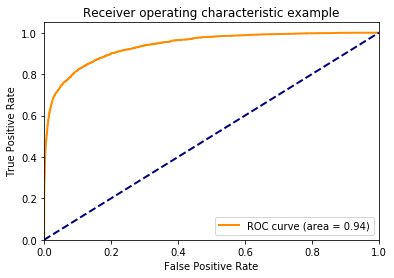

In [47]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
# predict scores
fpr, tpr, thrshold = roc_curve(aggression_rs["y_true_binary"], aggression_rs["y_prediction"])
roc_auc = auc(aggression_rs["y_true_binary"], aggression_rs["y_prediction"])
print("AUC score", roc_auc)

AUC score 0.8083884355920188


In [56]:
# Confusion Matrix
tn, fp, fn, tp = cm(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"]).ravel()

In [57]:
tn, fp, fn, tp 

(24731, 481, 1367, 2387)

In [59]:
F1_score = f1_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])

In [60]:
F1_score

0.7209302325581396

In [63]:
# balanced accuracy
balanced_accuracy_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])

0.8083884355920188

In [65]:
#imbalanced accuracy score - NOT TO Trust
accuracy_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])

0.9362010633156114

# Aggression dataset - linear - char - oh label

In [100]:
aggression_char_rs = pd.read_csv("linear_char_oh_aggression_prediction_results.csv")

(0, 25000)

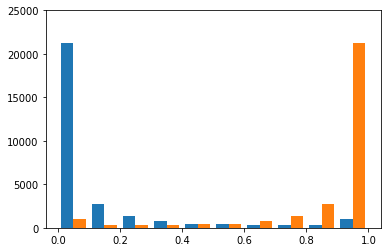

In [126]:
# 1 prediction distribution of aggression
# 0 negative prediction distribution of aggression
plt.hist([aggression_char_rs["y_predict_prob_1"],aggression_char_rs["y_predict_prob_0"]])
plt.ylim(0, 25000, 500)

AUC score 0.9105041568478747


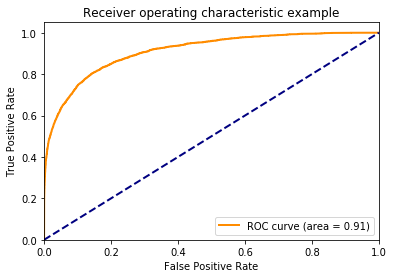

In [110]:
# predict.prob scores
fpr, tpr, thrshold = roc_curve(aggression_char_rs["y_true_bool"], aggression_char_rs["y_predict_prob_1"])
roc_auc = auc(aggression_char_rs["y_true_bool"], aggression_char_rs["y_predict_prob_1"])
print("AUC score", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [112]:
# predict scores
fpr, tpr, thrshold = roc_curve(aggression_rs["y_true_binary"], aggression_rs["y_prediction"])
roc_auc = auc(aggression_rs["y_true_binary"], aggression_rs["y_prediction"])
print("AUC score", roc_auc)
# Confusion Matrix
tn, fp, fn, tp = cm(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"]).ravel()
print("CM", tn, fp, fn, tp)
F1_score = f1_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])
print("F1-score", F1_score)
# balanced accuracy
balanced_accuracy_score = balanced_accuracy_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])
print("balanced_accuracy_score", balanced_accuracy_score)
#imbalanced accuracy score - NOT TO Trust
imbalanced_accuracy_score = accuracy_score(y_true=aggression_rs["y_true_binary"], y_pred=aggression_rs["y_prediction"])
print("imbalanced_accuracy_score", imbalanced_accuracy_score)

AUC score 0.8083884355920188
CM 24731 481 1367 2387
F1-score 0.7209302325581396
balanced_accuracy_score 0.8083884355920188
imbalanced_accuracy_score 0.9362010633156114


# Aggression MLP word oh

In [113]:
agression_mlp_rs = pd.read_csv("mlp_word_oh_aggression_prediction_results.csv")

(0, 25000)

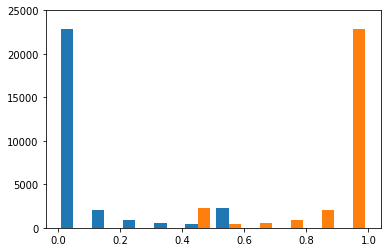

In [114]:
# 1 prediction distribution of aggression
# 0 negative prediction distribution of aggression
plt.hist([agression_mlp_rs["y_predict_prob_1"],agression_mlp_rs["y_predict_prob_0"]])
plt.ylim(0, 25000)

AUC score 0.9403473145488646


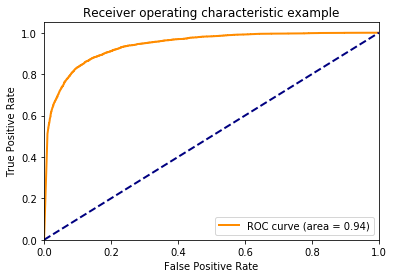

In [115]:
# predict.prob scores
fpr, tpr, thrshold = roc_curve(agression_mlp_rs["y_true_bool"], agression_mlp_rs["y_predict_prob_1"])
roc_auc = auc(agression_mlp_rs["y_true_bool"], agression_mlp_rs["y_predict_prob_1"])
print("AUC score", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [119]:
# predict scores
fpr, tpr, thrshold = roc_curve(agression_mlp_rs["y_true_binary"], agression_mlp_rs["y_prediction"])
roc_auc = auc(agression_mlp_rs["y_true_binary"], agression_mlp_rs["y_prediction"])
print("AUC score", roc_auc)
# Confusion Matrix
tn, fp, fn, tp = cm(y_true=agression_mlp_rs["y_true_binary"], y_pred=agression_mlp_rs["y_prediction"]).ravel()
print("CM", tn, fp, fn, tp)
F1_score = f1_score(y_true=agression_mlp_rs["y_true_binary"], y_pred=agression_mlp_rs["y_prediction"])
print("F1-score", F1_score)

AUC score 0.7552015488307529
CM 24937 275 1797 1957
F1-score 0.6538590043434681


In [120]:
#imbalanced accuracy - Not to trust
imbalanced_accuracy_score = accuracy_score(y_true=agression_mlp_rs["y_true_binary"], y_pred=agression_mlp_rs["y_prediction"])
print("imbalanced_accuracy_score", imbalanced_accuracy_score)

imbalanced_accuracy_score 0.9284678588690188


# aggression MLP char oh

In [121]:
agression_mlp_char_rs = pd.read_csv("mlp_char_oh_aggression_prediction_results.csv")

(0, 25000)

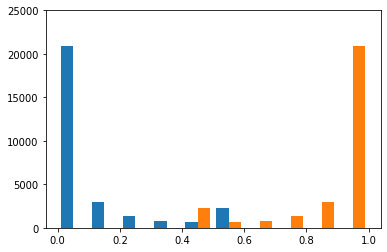

In [122]:
# 1 prediction distribution of aggression
# 0 negative prediction distribution of aggression
plt.hist([agression_mlp_char_rs["y_predict_prob_1"],agression_mlp_char_rs["y_predict_prob_0"]])
plt.ylim(0, 25000)

AUC score 0.9417900340146901


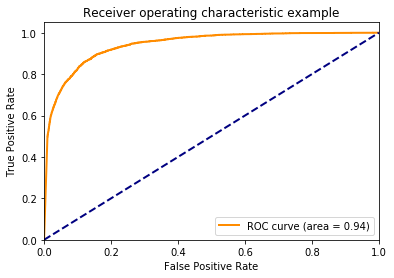

In [123]:
# predict.prob scores
fpr, tpr, thrshold = roc_curve(agression_mlp_char_rs["y_true_bool"], agression_mlp_char_rs["y_predict_prob_1"])
roc_auc = auc(agression_mlp_char_rs["y_true_bool"], agression_mlp_char_rs["y_predict_prob_1"])
print("AUC score", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [124]:
# predict scores
fpr, tpr, thrshold = roc_curve(agression_mlp_char_rs["y_true_binary"], agression_mlp_char_rs["y_prediction"])
roc_auc = auc(agression_mlp_char_rs["y_true_binary"], agression_mlp_char_rs["y_prediction"])
print("AUC score", roc_auc)
# Confusion Matrix
tn, fp, fn, tp = cm(y_true=agression_mlp_char_rs["y_true_binary"], y_pred=agression_mlp_char_rs["y_prediction"]).ravel()
print("CM", tn, fp, fn, tp)
F1_score = f1_score(y_true=agression_mlp_char_rs["y_true_binary"], y_pred=agression_mlp_char_rs["y_prediction"])
print("F1-score", F1_score)

AUC score 0.7597327013925319
CM 24897 346 1738 1985
F1-score 0.6557647836141393
